<a href="https://colab.research.google.com/github/AInitikesh/Seminar/blob/main/Neural_network_final_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, datasets

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=input_shape))
model.add(layers.Flatten())
model.add(layers.Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
batch_size = 128
epochs = 15
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 0.4949 - accuracy: 0.8602 - val_loss: 0.2081 - val_accuracy: 0.9417
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9373 - val_loss: 0.1570 - val_accuracy: 0.9553
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9512 - val_loss: 0.1280 - val_accuracy: 0.9633
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1375 - accuracy: 0.9591 - val_loss: 0.1187 - val_accuracy: 0.9670
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.9650 - val_loss: 0.1138 - val_accuracy: 0.9663
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9691 - val_loss: 0.1033 - val_accuracy: 0.9708
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9715 - val_loss: 0.0987 - val_accuracy: 0.9710
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.103232741355896
Test accuracy: 0.9710999727249146


In [ ]:
image = np.expand_dims(x_test[1], axis=0)

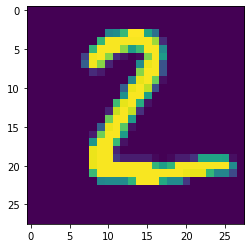

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1].reshape((28,28)))

In [ ]:
class_prob = model.predict(image)

In [ ]:
print(class_prob)

[[1.10658305e-11 1.94030465e-04 9.99805868e-01 8.19755783e-08
  4.90257058e-16 5.53901586e-12 5.40457019e-11 1.99275102e-12
  2.22490719e-08 7.86467031e-18]]


In [ ]:
np.argmax(class_prob)

2

# Introduction to Computer vision